<a href="https://colab.research.google.com/github/jyotidabass/Decorrelation-stretch/blob/main/Decorrelation_stretch_tongue_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from functools import reduce

def decorrstretch(A, tol=None):
    """
    Apply decorrelation stretch to image
    Arguments:
    A   -- original image as numpy.array.
    tol -- specify a linear contrast stretch, e.g. 0.01.
    """

    # save the original shape
    orig_shape = A.shape
    # reshape the image
    #         B G R
    # pixel 1 .
    # pixel 2   .
    #  . . .      .
    A = A.reshape((-1,3)).astype(np.float)
    # covariance matrix of A
    cov = np.cov(A.T)
    # source and target sigma
    sigma = np.diag(np.sqrt(cov.diagonal()))
    # eigen decomposition of covariance matrix
    eigval, V = np.linalg.eig(cov)
    # stretch matrix
    S = np.diag(1/np.sqrt(eigval))
    # compute mean of each color
    mean = np.mean(A, axis=0)
    # substract the mean from image
    A -= mean
    # compute the transformation matrix
    T = reduce(np.dot, [sigma, V, S, V.T])
    # compute offset 
    offset = mean - np.dot(mean, T)
    # transform the image
    A = np.dot(A, T)
    # add the mean and offset
    A += mean + offset
    # restore original shape
    B = A.reshape(orig_shape)
    # for each color...
    for b in range(3):
        # apply contrast stretching if requested
        if tol:
            # find lower and upper limit for contrast stretching
            low, high = np.percentile(B[:,:,b], 100*tol), np.percentile(B[:,:,b], 100-100*tol)
            B[B<low] = low
            B[B>high] = high
        # ...rescale the color values to 0..255
        B[:,:,b] = 255 * (B[:,:,b] - B[:,:,b].min())/(B[:,:,b].max() - B[:,:,b].min())
    # return it as uint8 (byte) image
    return B.astype(np.uint8)

In [13]:
from PIL import Image
import numpy as np


# get imput from user.
infile = input("Enter file to process: ")
outfile = input("Enter output file: ")
tol_val = input("Enter tol value (optional): ")

# If a value is given, convert to float.
if tol_val:
    tol = float(tol_val)
else:
    tol = None

print("Processing ...")

# Load input file using PIL.
img = Image.open(infile)
# Convert image to numpy array.
A = np.array(img)
# process image.
processed = decorrstretch(A, tol)
# Save processed image to output file.
Image.fromarray(processed).save(outfile)

print("Done")


Enter file to process: /content/2C63DD3C-2264-434F-BF27-CC3D366C63D9 - tripuresh tripathi.jpeg
Enter output file: /content/2C63DD3C-2264-434F-BF27-CC3D366C63D9 - tripuresh tripathi.jpeg
Enter tol value (optional): 0.01
Processing ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Done


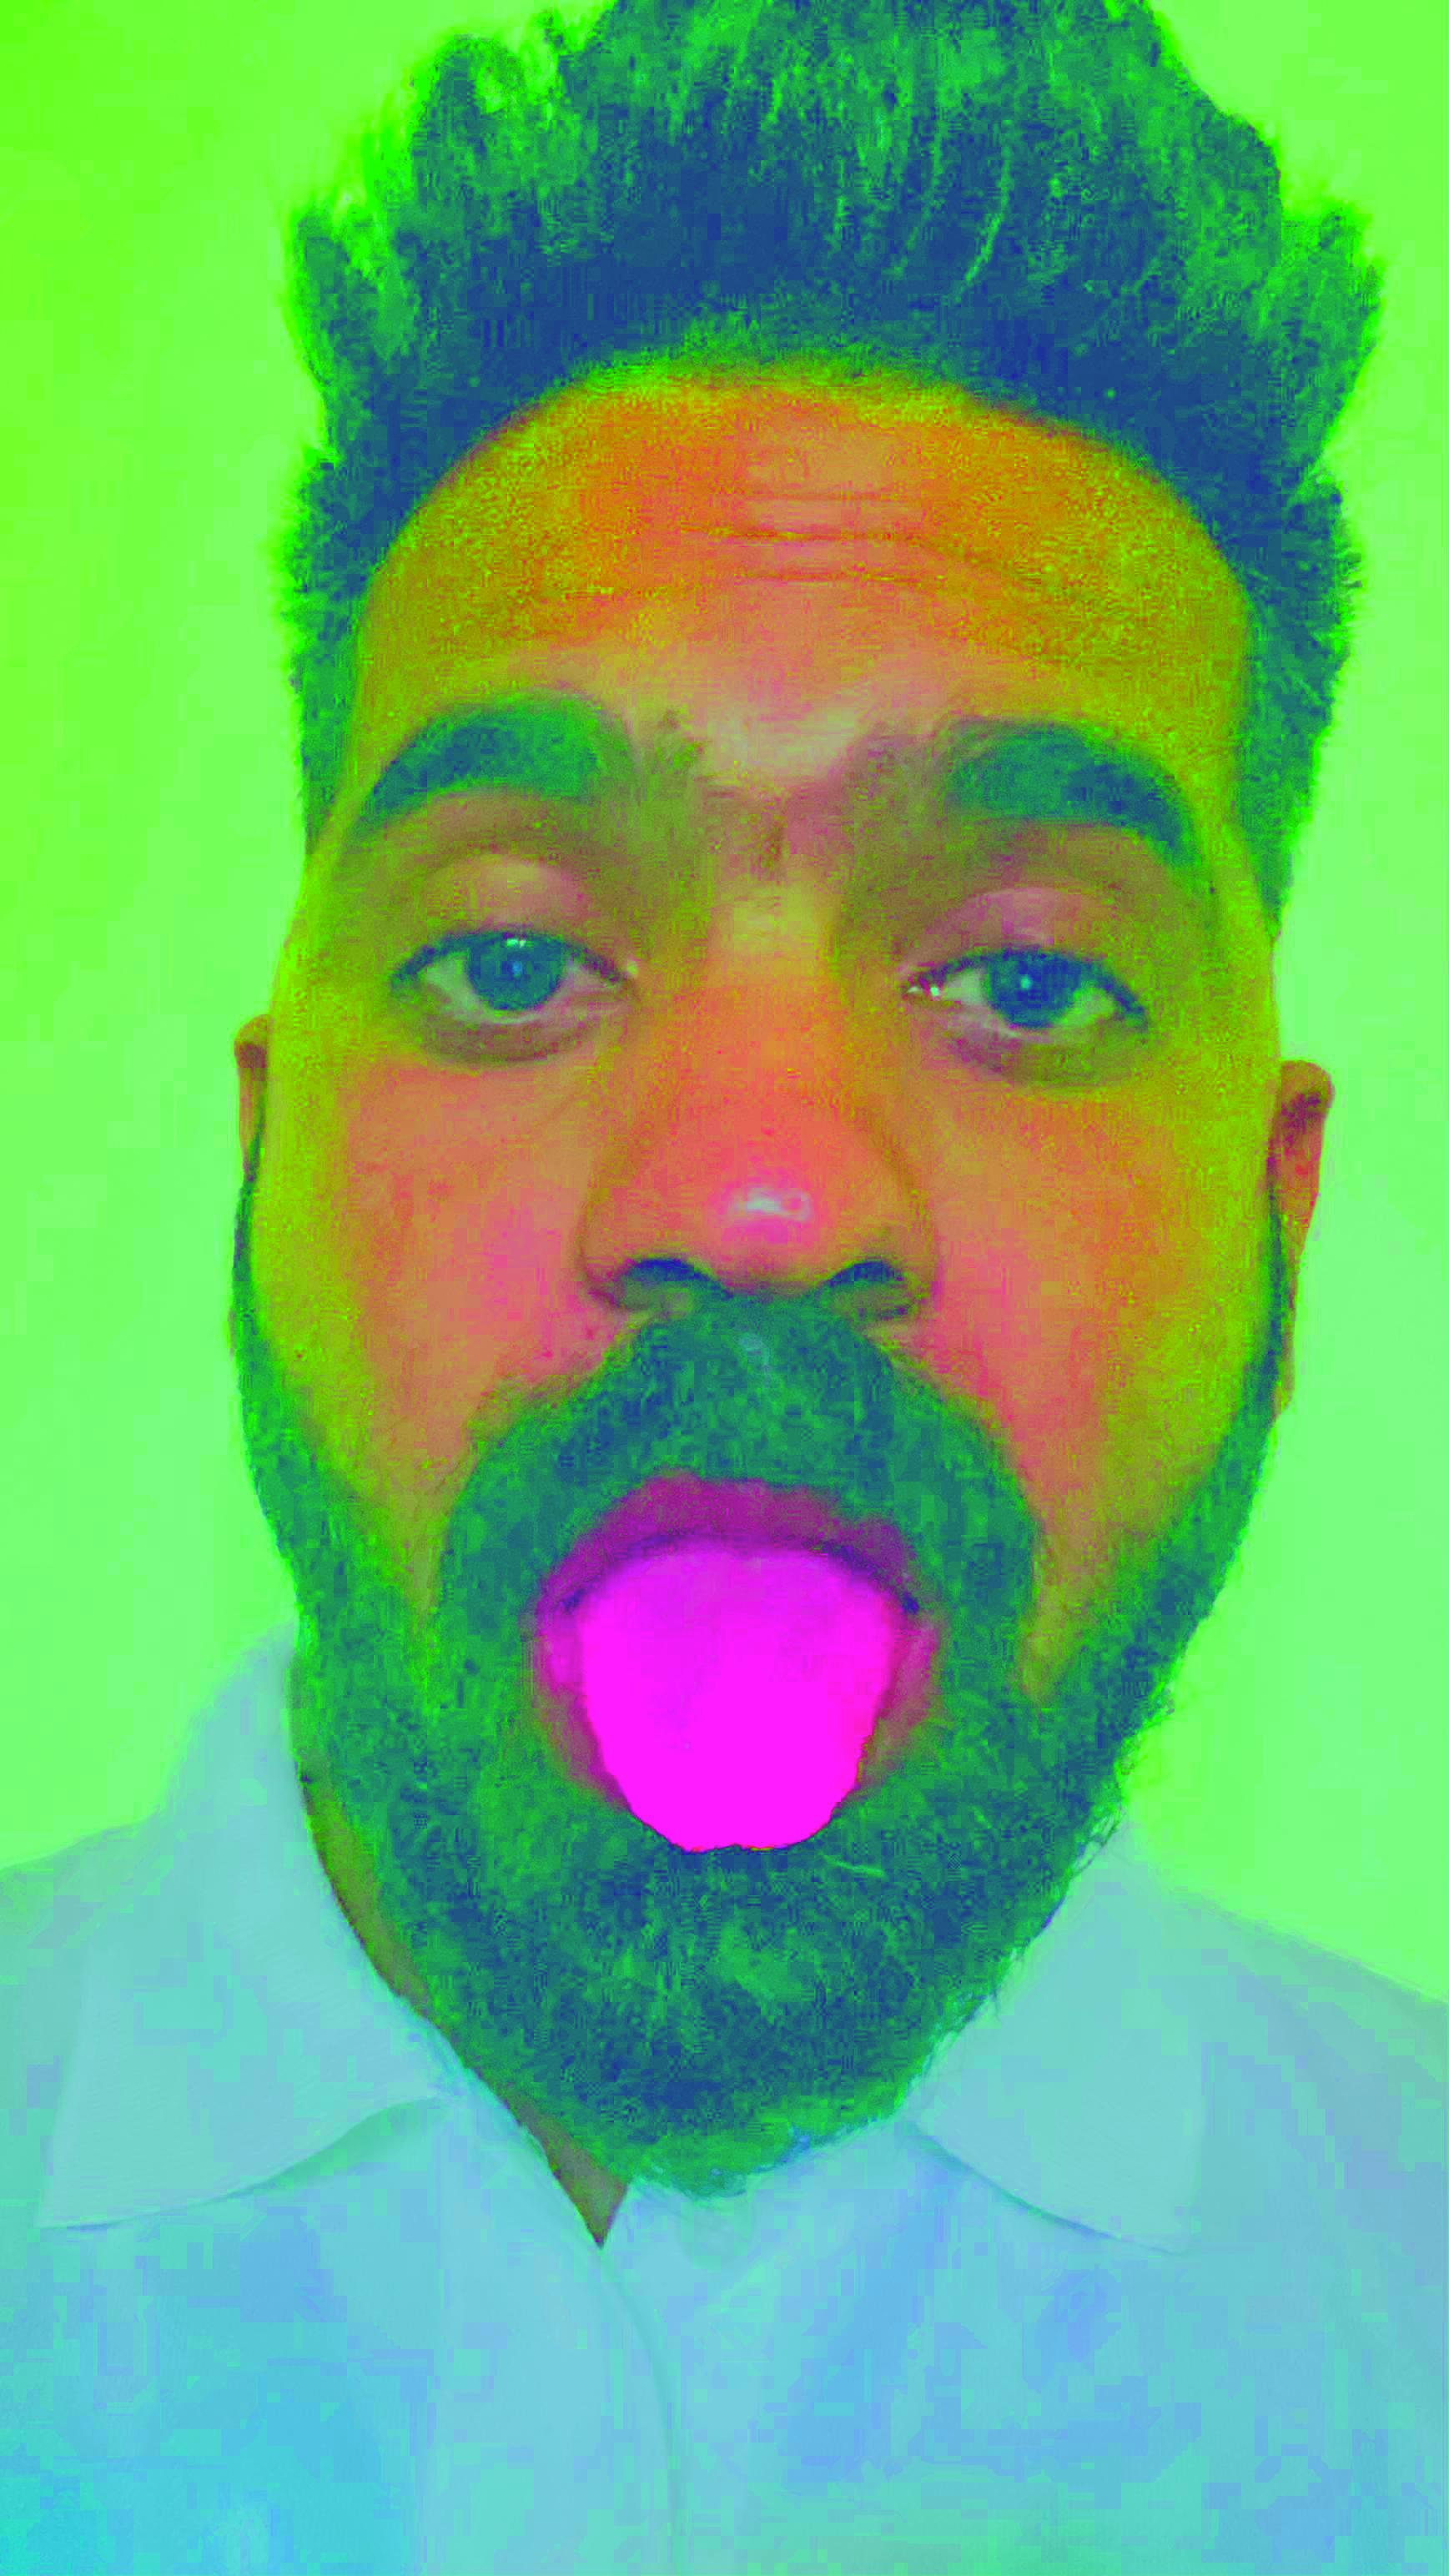

In [10]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2C63DD3C-2264-434F-BF27-CC3D366C63D9 - tripuresh tripathi.jpeg')
cv2_imshow(img)